# STA302 Project 2 #

## Task 1 ##

1. Simualate the code

1.First assume that the correlation between the three predictors are zero, i.e., the off diagonals of sigmat are zero. Set the number of simulations nsim = 100. Generate Y for each simulation. Then run simple linear regression for each of the three variables seperately. Obtain the regression parameter estimates and their variances from the coefficients tables obtained from the lm function. Comment on whether the estimates are unbiased. Also, comment on their variances.

In [197]:
rm(list = ls())
library(MASS)

## Simulation for correlated predictors ##
set.seed(1003998757)

nsample <- 10; nsim <- 100
sig2 <- rchisq(1, df = 1) ## The true error variance
bet <- c(rnorm(3, 0, 1), 0) ## 4 values of beta that is beta0, beta1, beta2, beta3 = 0
muvec <- rnorm(3, 0, 1)
sigmat <- diag(rchisq(3, df = 4))
X <- mvrnorm(nsample, mu = muvec, Sigma = sigmat); 
Xmat <- cbind(1, X)

varModel11 <- vector()
varModel12 <- vector()
varModel13 <- vector()
varModel1 <- vector()
varModel2 <- vector()
varModel3 <- vector()

beta11 <- vector()
beta12 <- vector()
beta13 <- vector()
beta14 <- vector()

## Simulate the response ##
bets <- matrix(NA, ncol = length(bet), nrow = nsim)
for(i in 1:nsim){
  Y <- Xmat%*%bet + rnorm(nsample, 0, sqrt(sig2))
  
  model11 <- lm(Y ~ X[,1])
  model12 <- lm(Y ~ X[,2])
  model13 <- lm(Y ~ X[,3])
    

  model <- lm(Y ~ X)
  bets[i,] <- coef(model)
    
#     print(coef(model))
  
  # error estim of 3 seperate models
  varModel11[i] = summary(model11)$coefficients[2, 2]^2
  varModel12[i] = summary(model12)$coefficients[2, 2]^2
  varModel13[i] = summary(model13)$coefficients[2, 2]^2
    

  # regression param of 3 seperate models
  beta11[i] <- summary(model11)$coefficients[2, 1]
  beta12[i] <- summary(model12)$coefficients[2, 1]
  beta13[i] <- summary(model13)$coefficients[2, 1]
    
    
  # original model var
  varModel1[i] = summary(model)$coefficients[2, 2]^2
  varModel2[i] = summary(model)$coefficients[3, 2]^2
  varModel3[i] = summary(model)$coefficients[4, 2]^2

}

print('beta estimates for each regression param lm')
mean(beta11)
mean(beta12)
mean(beta13)

# output of std variance of each regression model
print('Variance of each regression model')
mean(varModel11); mean(varModel12); mean(varModel13); 

# output of variance of original model
print('Variance of original model')
mean(varModel1); mean(varModel2); mean(varModel3); 

[1] "beta estimates for each regression param lm"


[1] -1.776571

[1] -1.859531

[1] -0.3718519

[1] "Variance of each regression model"


[1] 0.3276507

[1] 0.01013355

[1] 0.9146763

[1] "Variance of original model"


[1] 6.058968e-05

[1] 3.672524e-05

[1] 4.798806e-05

2.Now fit a multiple linear regression and obtain the regression parameter estimates along with their variances from each simulation. Again check the unbiasedness and the variances. Compare the results with step 1.

In [198]:
print('Regression Parameter estimates')
mean(bets[,1]);mean(bets[,2]); mean(bets[,3]); mean(bets[,4]);  

print('Original values')
bet[1];bet[2]; bet[3]; bet[4]


# almost identical, unbiased
print('Variances of reg param estimates')
var(bets[, 1])
var(bets[,2])
var(bets[,3])
var(bets[,4])

[1] "Regression Parameter estimates"


[1] -2.283084

[1] -0.467476

[1] -1.629555

[1] 0.001045265

[1] "Original values"


[1] -2.278593

[1] -0.4669518

[1] -1.629215

[1] 0

[1] "Variances of reg param estimates"


[1] 0.0007583937

[1] 6.216976e-05

[1] 3.695182e-05

[1] 5.046346e-05

3. Now assume X1 and X2 are correlated. You can select a value for correlation (e.g., r12 = 0.2). Then add the following covariance terms in the sigmat matrix,

Again run simple linear regressions on each of the predictors and also a multiple linear re- gression. Compare the results with step 1 and 2 and comment on the differences/similarities between the results. Start increasing the value of the correlation coefficient r12, (e.g., 0.5, 0.7, 0.8 etc.) and again perform step 1 and 2. How do the estimates and standard error of β1 and β2 change for simple and multiple linear regressions as the correlation changes?

In [199]:
r12 <- 0.2
sigmat[1,2] <- sigmat[2,1] <- r12*sqrt(sigmat[1,1])*sqrt(sigmat[2,2])
## Simulation for Categorical Variables with Interaction ##
set.seed(1003998757)
X <- mvrnorm(nsample, mu = muvec, Sigma = sigmat); 
Xmat <- cbind(1, X)

# cor(X[,1], X[,2])

In [200]:
rm(list = ls())
library(MASS)

## Simulation for correlated predictors ##
# set.seed(1003998757)

nsample <- 10; nsim <- 100
sig2 <- rchisq(1, df = 1) ## The true error variance
bet <- c(rnorm(3, 0, 1), 0) ## 4 values of beta that is beta0, beta1, beta2, beta3 = 0
muvec <- rnorm(3, 0, 1)
sigmat <- diag(rchisq(3, df = 4))
X <- mvrnorm(nsample, mu = muvec, Sigma = sigmat); 
Xmat <- cbind(1, X)

varModel11 <- vector()
varModel12 <- vector()
varModel13 <- vector()
varModel1 <- vector()
varModel2 <- vector()
varModel3 <- vector()

beta11 <- vector()
beta12 <- vector()
beta13 <- vector()
beta14 <- vector()

## Simulate the response ##
bets <- matrix(NA, ncol = length(bet), nrow = nsim)
for(i in 1:nsim){
  Y <- Xmat%*%bet + rnorm(nsample, 0, sqrt(sig2))
  
  model11 <- lm(Y ~ X[,1])
  model12 <- lm(Y ~ X[,2])
  model13 <- lm(Y ~ X[,3])
    

  model <- lm(Y ~ X)
  bets[i,] <- coef(model)
    
#     print(coef(model))
  
  # error estim of 3 seperate models
  varModel11[i] = summary(model11)$coefficients[2, 2]^2
  varModel12[i] = summary(model12)$coefficients[2, 2]^2
  varModel13[i] = summary(model13)$coefficients[2, 2]^2
    

  # regression param of 3 seperate models
  beta11[i] <- summary(model11)$coefficients[2, 1]
  beta12[i] <- summary(model12)$coefficients[2, 1]
  beta13[i] <- summary(model13)$coefficients[2, 1]
    
    
  # original model var
  varModel1[i] = summary(model)$coefficients[2, 2]^2
  varModel2[i] = summary(model)$coefficients[3, 2]^2
  varModel3[i] = summary(model)$coefficients[4, 2]^2

}

print('beta estimates for each regression param lm')
mean(beta11)
mean(beta12)
mean(beta13)

# output of std variance of each regression model
print('Variance of each regression model')
mean(varModel11); mean(varModel12); mean(varModel13); 

# output of variance of original model
print('Variance of original model')
mean(varModel1); mean(varModel2); mean(varModel3); 


[1] "beta estimates for each regression param lm"


[1] -0.3006745

[1] 0.25635

[1] 0.07798888

[1] "Variance of each regression model"


[1] 0.007463848

[1] 0.0393446

[1] 0.04885435

[1] "Variance of original model"


[1] 0.002329455

[1] 0.005846285

[1] 0.006047695

In [201]:
print('Regression Parameter estimates')
mean(bets[,1]);mean(bets[,2]); mean(bets[,3]); mean(bets[,4]);  

print('Original values')
bet[1];bet[2]; bet[3]; bet[4]


# almost identical, unbiased
print('Variances of reg param estimates')
var(bets[, 1])
var(bets[,2])
var(bets[,3])
var(bets[,4])

[1] "Regression Parameter estimates"


[1] 0.3056353

[1] -0.3290636

[1] 0.3285633

[1] 0.003491332

[1] "Original values"


[1] 0.344163

[1] -0.3206833

[1] 0.3188115

[1] 0

[1] "Variances of reg param estimates"


[1] 0.02885177

[1] 0.002582414

[1] 0.005437174

[1] 0.005849713

4.Now assume X1 and X2 are uncorrelated, i.e., r12 = 0 and sigmat[1,2] = sigmat[2,1] = 0. Instead X1 and X3 are correlated. Select a value for r13 arbitrarily (e.g., r13 = 0.5). Now change the values of sigma[1,3] and sigmat[3,1] using similar codes as You can select a value for correlation (e.g., r13 = 0.5). Recall, that the true β3 = 0. Againperform step 1 and 2. Compare the results with the results obtained from step 3 and comment on the differences/similarities. Start increasing the value of the correlation coefficient r13, (e.g., 0.5, 0.7, 0.8, 0.9, 0.95 etc.). How do the estimates and standard error of β1 and β2 change for simple and multiple linear regression as the correlation changes?

In [211]:
# r12 <- 0
r13 <- 0.5
sigmat[1,3] <- sigmat[3,1] <- r13*sqrt(sigmat[1,1])*sqrt(sigmat[3,3])
## Simulation for Categorical Variables with Interaction ##
set.seed(1003998757)
X <- mvrnorm(nsample, mu = muvec, Sigma = sigmat); 
Xmat <- cbind(1, X)

# # cor(X[,1], X[,2])

nsample <- 10; nsim <- 100
sig2 <- rchisq(1, df = 1) ## The true error variance
bet <- c(rnorm(3, 0, 1), 0) ## 4 values of beta that is beta0, beta1, beta2, beta3 = 0
muvec <- rnorm(3, 0, 1)
sigmat <- diag(rchisq(3, df = 4))
X <- mvrnorm(nsample, mu = muvec, Sigma = sigmat); cor(X[,1], X[,2])
Xmat <- cbind(1, X)

varModel11 <- vector()
varModel12 <- vector()
varModel13 <- vector()
varModel1 <- vector()
varModel2 <- vector()
varModel3 <- vector()

beta11 <- vector()
beta12 <- vector()
beta13 <- vector()
beta14 <- vector()

## Simulate the response ##
bets <- matrix(NA, ncol = length(bet), nrow = nsim)
for(i in 1:nsim){
  Y <- Xmat%*%bet + rnorm(nsample, 0, sqrt(sig2))
  model11 <- lm(Y ~ X[,1])
  model12 <- lm(Y ~ X[,2])
  model13 <- lm(Y ~ X[,3])
  model <- lm(Y ~ X)
  bets[i,] <- coef(model)
  
  varModel11[i] = summary(model11)$coefficients[2, 2]^2
  varModel12[i] = summary(model12)$coefficients[2, 2]^2
  varModel13[i] = summary(model13)$coefficients[2, 2]^2
  varModel1[i] = summary(model)$coefficients[2, 2]^2
  varModel2[i] = summary(model)$coefficients[3, 2]^2
  varModel3[i] = summary(model)$coefficients[4, 2]^2
  
  beta11[i] <- summary(model11)$coefficients[2, 1]
  beta12[i] <- summary(model12)$coefficients[2, 1]
  beta13[i] <- summary(model13)$coefficients[2, 1]
}

print('beta estimates for each regression param lm')
mean(beta11)
mean(beta12)
mean(beta13)

# output of std variance of each regression model
print('Variance of each regression model')
mean(varModel11); mean(varModel12); mean(varModel13); 

# output of variance of original model
print('Variance of original model')
mean(varModel1); mean(varModel2); mean(varModel3); 

[1] 0.1384258

[1] "beta estimates for each regression param lm"


[1] -0.3006745

[1] 0.25635

[1] 0.07798888

[1] "Variance of each regression model"


[1] 0.007463848

[1] 0.0393446

[1] 0.04885435

[1] "Variance of original model"


[1] 0.002329455

[1] 0.005846285

[1] 0.006047695

In [212]:
print('Regression Parameter estimates')
mean(bets[,1]);mean(bets[,2]); mean(bets[,3]); mean(bets[,4]);  

print('Original values')
bet[1];bet[2]; bet[3]; bet[4]


# almost identical, unbiased
print('Variances of reg param estimates')
var(bets[, 1])
var(bets[,2])
var(bets[,3])
var(bets[,4])

[1] "Regression Parameter estimates"


[1] 0.3056353

[1] -0.3290636

[1] 0.3285633

[1] 0.003491332

[1] "Original values"


[1] 0.344163

[1] -0.3206833

[1] 0.3188115

[1] 0

[1] "Variances of reg param estimates"


[1] 0.02885177

[1] 0.002582414

[1] 0.005437174

[1] 0.005849713

1.Please set your student ID as seed. Generate 500 random values from X1 ∼ Uniform[0, 1], X2 ∼ Uniform[0, 1], X3 ∼ Uniform[0, 1], X4 ∼ Uniform[0, 1], X5 ∼ Uniform[0, 1]

Generate, Y = 4[sin(πx1x2) + 8(x3 − 0.5)3 + 1.5x4 − x5 − 0.77] + ε. Here, π = 3.14..... and ε ∼ N(0, 1). You can use the following codes:

1. In real life data we don’t know the true relationship between the response and predictors. The only thing we have is the dataset dat. Perform a multiple regression analysis on the response Y with the 5 predictors in the dataset. Check all the diagnostics (leverages, influential observations, standardized residuals etc.). Comment on your findings.The simulation here needs to be done only once.

,X1,X2,X3,X4,X5,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.03338199,0.02897732,0.9706271,0.27638186,0.08691421,0.8945871
2,0.05110440,0.07217399,0.2662469,0.40772411,0.10850439,-0.8969061
3,0.01134564,0.17977723,0.5070305,0.84109876,0.07468546,0.1306082
4,0.40070188,0.97339211,0.5367915,0.73937933,0.25733439,3.2397288
5,0.32026718,0.95789974,0.6077668,0.98913414,0.60691646,5.7218094
6,0.13510452,0.90313014,0.4670547,0.07828432,0.66017818,-3.4998912


,(Intercept),X1,X2,X3,X4,X5
1,1,0.03338199,0.02897732,0.9706271,0.27638186,0.08691421
2,1,0.05110440,0.07217399,0.2662469,0.40772411,0.10850439
3,1,0.01134564,0.17977723,0.5070305,0.84109876,0.07468546
4,1,0.40070188,0.97339211,0.5367915,0.73937933,0.25733439
5,1,0.32026718,0.95789974,0.6077668,0.98913414,0.60691646
6,1,0.13510452,0.90313014,0.4670547,0.07828432,0.66017818


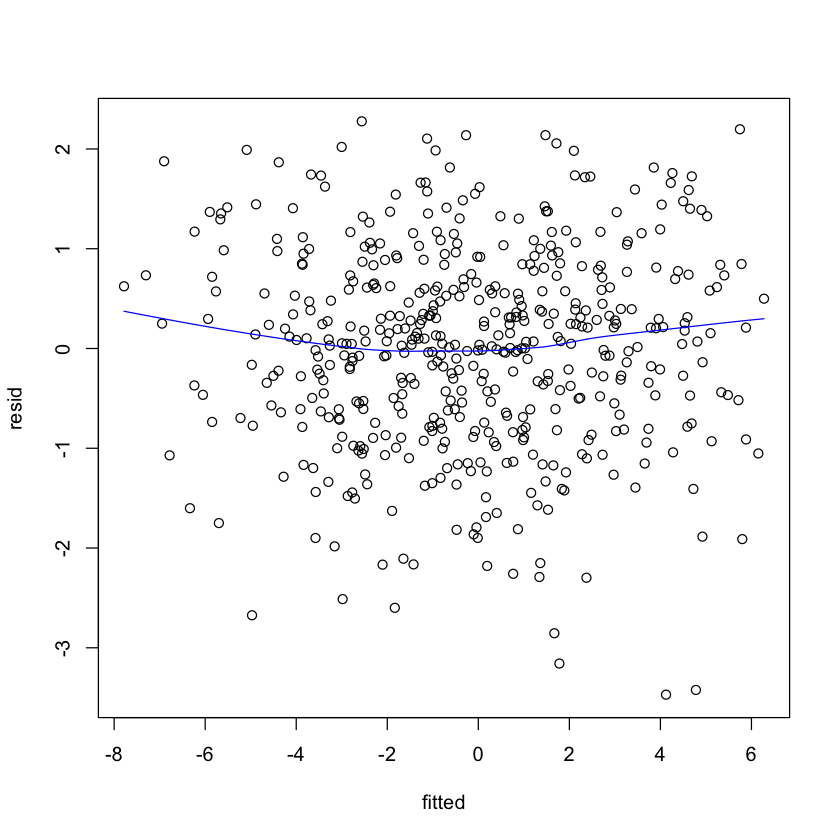

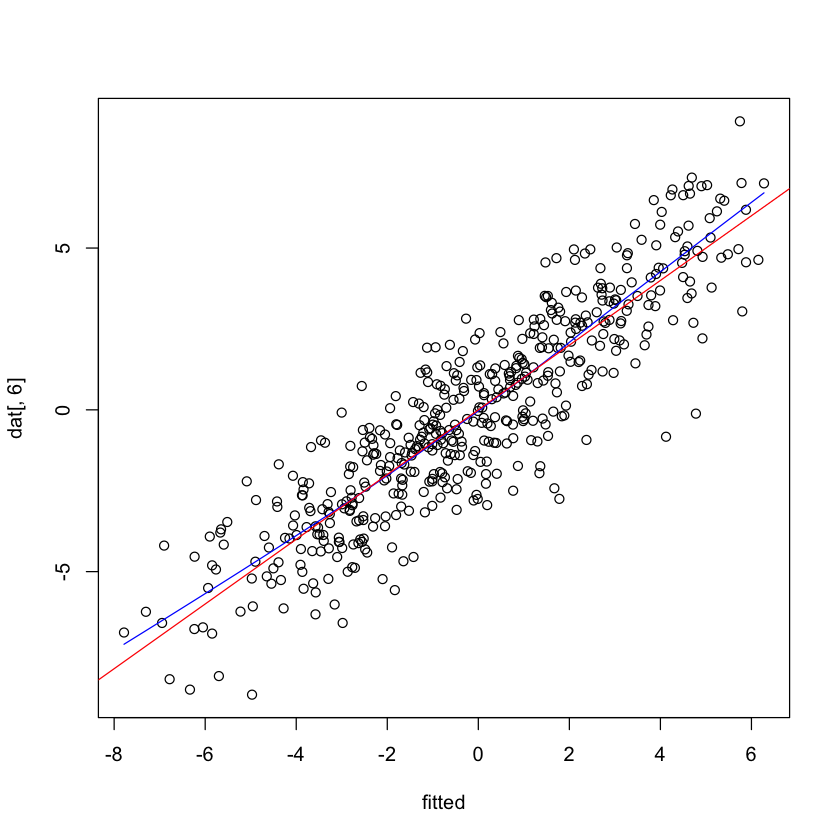

In [213]:
## Simulation for predictors ##

# This following function provides a data set with p+1 columns #
gendata <- function(n, p){
  Xmat <- matrix(runif(n*p, 0, 1), nrow = n, ncol = p)
  Y <- 4*( (sin(pi*Xmat[,1]*Xmat[,2])) + 8*(Xmat[,3] - 0.5)^3 +
              1.5*Xmat[,4] - Xmat[,5] - 0.77    ) + rnorm(n, 0, 1)
  dat <- cbind(Xmat, Y)
  return(dat)
}

set.seed(1003998757)
dat <- as.data.frame(gendata(500, 5))
colnames(dat) <- c(paste0("X", 1:5), "Y")
head(dat)

model <- lm(dat$Y ~ ., data = dat)
head(model.matrix(model))

resid <- rstudent(model)
fitted <- predict(model)
plot(resid~fitted)
lines(lowess(fitted, resid), col = "blue")

plot(dat[,6]~fitted)
lines(lowess(fitted, dat[,6]), col = "blue")
mmm <- lm (dat[,6] ~ fitted)
abline(mmm, col='red')

In [216]:

# leverage bs
h <- hatvalues(model)
# print
thresh <- (2 * dim(model.matrix(model))[2]) / nrow(dat)
w <- which(h>thresh)

print('Leverages:')
print(w)



### The Influential Observations ####
D <- cooks.distance(model)
# p = 6 since 5 samples + 1
# n - p - 1 -> 4 params
which(D > qf(0.5, 6, 494))

print('Influentials:')
print(which(D > qf(0.5, 6, 494))
)



# ## DFFITS ##
print('Dfits:')
dfits <- dffits(model)
which(abs(dfits) > 2*sqrt(5/500))

## DFBETAS ##
print('DFbetas:')
dfb <- dfbetas(model)
which(abs(dfb[,1]) > 2/sqrt(500))


[1] "Leverages:"
78 
78 


named integer(0)

[1] "Influentials:"
named integer(0)
[1] "Dfits:"


18  20  36  39  56  96 104 114 128 131 139 141 154 155 167 170 198 199 252 261 
 18  20  36  39  56  96 104 114 128 131 139 141 154 155 167 170 198 199 252 261 
265 275 277 299 315 331 355 363 373 387 388 408 412 416 453 457 464 487 496 
265 275 277 299 315 331 355 363 373 387 388 408 412 416 453 457 464 487 496

[1] "DFbetas:"


2  18  40  56  60 114 128 131 141 154 155 170 190 196 238 245 261 265 277 279 
  2  18  40  56  60 114 128 131 141 154 155 170 190 196 238 245 261 265 277 279 
315 319 363 369 373 388 408 413 431 457 464 468 
315 319 363 369 373 388 408 413 431 457 464 468

2. Simulate further 200 observations using gendata using the following code. Using the results obtained from step 1 calculate the mean prediction error of the new dataset.

In [98]:
dat.new <- as.data.frame(gendata(200, 5))
colnames(dat.new) <- c(paste0("X", 1:5), "Y")
pred.y <- predict(model, newdata = dat.new, type = "response", interval = "none")

## Prediction error ##4e
PE <- mean((dat.new$Y - pred.y)^2)

print(PE)

[1] 1.933062


3. Apply appropriate transformations (whatever transformation you think will help). Perform
step 1 and 2 again. Explain your findings.

,X1,X2,X3,X4,X5,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.96467891,0.17591404,0.8906631,0.2067999,0.8049133,-1.8054851
2,0.29421104,0.02006001,0.4437704,0.6552370,0.1721219,0.9605795
3,0.85395675,0.71219346,0.2967311,0.2324496,0.2927143,0.4981041
4,0.74528594,0.90866319,0.7110926,0.9034041,0.2377329,6.7556816
5,0.39004605,0.51710054,0.5256820,0.4089271,0.2894554,1.3560988
6,0.05904879,0.18516366,0.1620251,0.3859830,0.8645157,-6.5387646


,(Intercept),z1,z2,z3,z4
1,1,0.01215569,8.339128e-01,0.4145728,-0.3476568
2,1,0.04634887,-1.021792e-01,0.6115862,-0.4340175
3,1,0.02563130,2.780065e-06,1.2616481,-0.2987418
4,1,3.76369353,3.984127e-04,1.1090690,-1.0293376
5,1,3.28543702,1.001257e-02,1.4837012,-2.4276659
6,1,1.49603451,-2.860679e-04,0.1174265,-2.6407127


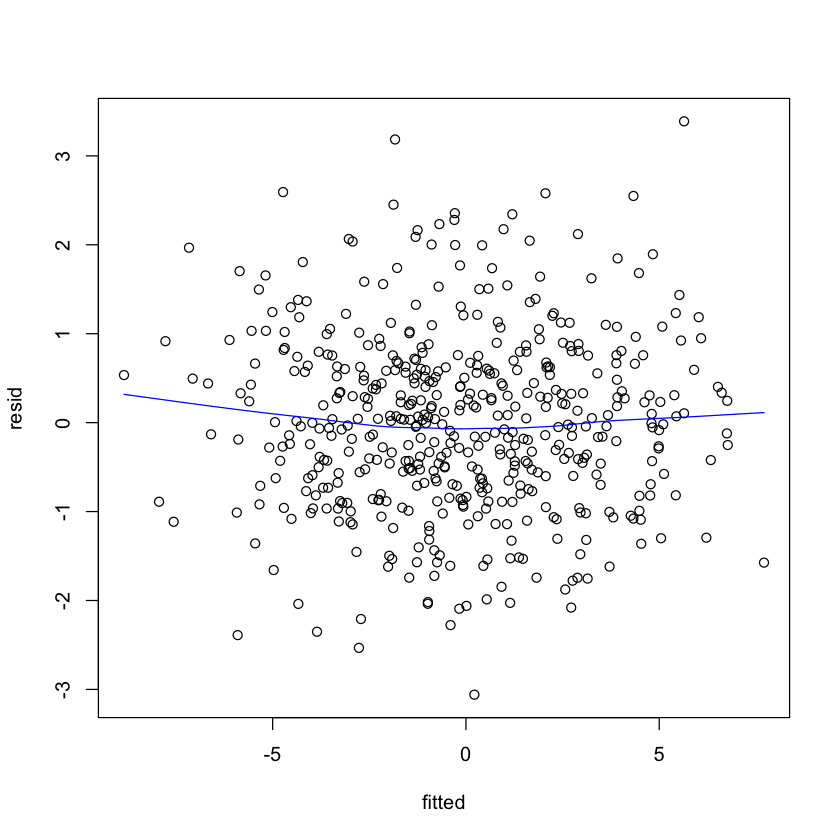

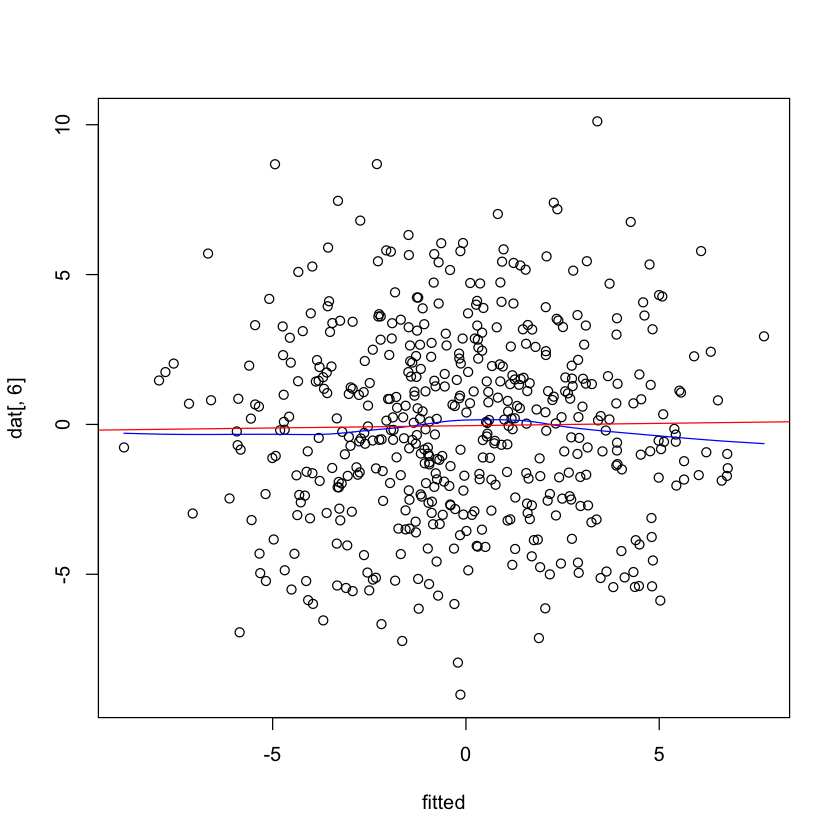

In [209]:
z1 = 4*sin(pi*dat[,1]*dat[,2])
z2=8*(dat[,3]-0.5)^3
z3=1.5*(dat[,4])
z4=-4*(dat[,5])
modelnew <- lm(dat$Y~ z1+z2+z3+z4)

gendata <- function(n, p){
  Xmat <- matrix(runif(n*p, 0, 1), nrow = n, ncol = p)
  Y <- 4*( (sin(pi*Xmat[,1]*Xmat[,2])) + 8*(Xmat[,3] - 0.5)^3 +
              1.5*Xmat[,4] - Xmat[,5] - 0.77    ) + rnorm(n, 0, 1)
  dat <- cbind(Xmat, Y)
  return(dat)
}


# set.seed(1003998757)
dat <- as.data.frame(gendata(500, 5))
colnames(dat) <- c(paste0("X", 1:5), "Y")
head(dat)

model <- lm(dat$Y ~ ., data = dat)
head(model.matrix(modelnew))

resid <- rstudent(modelnew)
fitted <- predict(modelnew)
plot(resid~fitted)
lines(lowess(fitted, resid), col = "blue")

plot(dat[,6]~fitted)
lines(lowess(fitted, dat[,6]), col = "blue")
mmm <- lm (dat[,6] ~ fitted)
abline(mmm, col='red')

In [210]:
dat.new <- as.data.frame(gendata(200, 5))
colnames(dat.new) <- c(paste0("X", 1:5), "Y")
pred.y <- predict(model, newdata = dat.new, type = "response", interval = "none")

## Prediction error ##4e
PE <- mean((dat.new$Y - pred.y)^2)

print(PE)

[1] 1.663672
